### The following sets up the fixed-point arithmetic functions and chaotic maps:

In [ ]:
import math

# Define constants (assuming these are defined somewhere in the C++ code)
FRAC = 30  # 30 bits to represent fraction
INT = 2   # 2 bits to represent integers
# M = 0xFFFFE000    # 3.99999 for logistic map control parameter
M = 0xFFFFFFFF    # 3.99999 for logistic map control parameter
R = 0x7FFFE000      # 1.99999 for tent map control parameter
ONE = 0x40000000  # 1.00 representation
HALF = 0x20000000 # 0.5 representation

# Helper function to mimic MUL macro in C++
def MUL(a, b):
    return (a * b) >> FRAC

# Print floating point representation of 32-bit fixed point
def getFixedPoint(x):
    mask = 0x1
    total = 0
    for i in range(FRAC, 0, -1):
        temp = 1 if (x & mask) != 0 else 0
        total += temp * math.pow(2, -i)
        x = x >> 1
    for i in range(INT):
        temp = 1 if (x & mask) != 0 else 0
        total += temp * math.pow(2, i)
        x = x >> 1
    return total

# Logistic map
def logistic(x):
    # x = rx(1-x) = rx-x^2
    return MUL(MUL(M, x), ONE - x)

# Logistic tent
def tent(x):
    if x < HALF:
        return MUL(R, x)
    return MUL(R, ONE - x)

# Count 1s in a 32-bit integer
def countSetBits(n):
    count = 0
    while n:
        count += n & 1
        n >>= 1
    return count

# Example usage
if __name__ == "__main__":
    print(f"Fixed point representation of control parameter: {getFixedPoint(M)}")
    x = 123456789
    print(f"Fixed point representation of {x}: {getFixedPoint(x)}")
    print(f"Logistic map of {x}: {logistic(x)}")
    print(f"Tent map of {x}: {tent(x)}")
    print(f"Number of set bits in {x}: {countSetBits(x)}")


Fixed point representation of control parameter: 3.9999999990686774
Fixed point representation of 123456789: 0.11497809458523989
Logistic map of 123456789: 437047849
Tent map of 123456789: 246912636
Number of set bits in 123456789: 16


---
### S-box DDT Code for reference:

In [ ]:
# Define the S-box
sBox = [0xC, 5, 6, 0xB, 9, 0, 0xA, 0xD, 3, 0xE, 0xF, 8, 4, 7, 1, 2]

# Initialize the difference table
diffTabOriginal = [[0 for _ in range(16)] for _ in range(16)]

# Compute the difference table
for dx in range(16):
    for i in range(16):
        j = dx ^ i
        dy = sBox[i] ^ sBox[j]
        diffTabOriginal[dx][dy] += 1

# Print the difference table and count zeroes and non-zeroes
zeroes = 0
nonzero = 0

for i in range(16):
    for j in range(16):
        print(f"{diffTabOriginal[i][j]}, ", end="")
    print()



16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 0, 
0, 0, 0, 2, 0, 4, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 
0, 2, 0, 2, 2, 0, 4, 2, 0, 0, 2, 2, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 4, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 
0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 4, 2, 0, 0, 
0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 4, 2, 0, 0, 4, 
0, 4, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 4, 
0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 
0, 0, 2, 0, 4, 0, 2, 0, 2, 0, 0, 0, 2, 0, 4, 0, 
0, 0, 2, 2, 0, 4, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 
0, 2, 0, 0, 2, 0, 0, 0, 4, 2, 2, 2, 0, 2, 0, 0, 
0, 0, 2, 0, 0, 4, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 
0, 2, 4, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 
0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 
0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 


---
# Experiment 1
Compute full 4-bit DDT for the chaos-based substitution function.

In [ ]:
# Initialize the difference table
diffTabOriginal = [[0 for _ in range(16)] for _ in range(16)]
counter = [0]*16

# Initial value of the chaotic map (taken from numbers of pi)
x = 0x03486104
# print(getFixedPoint(x))

#Iterate r times
def logi(x,r):
    # x = rx(1-x) = rx-x^2
    for i in range(r):
      x = MUL(MUL(M, x), ONE - x)
    return x

for dx in range(16):
    for i in range(16):
      j = dx ^ i
      dy = (logi(x ^ i,100) & 0xF) ^ (logi(x ^ j,100) & 0xF)
      diffTabOriginal[dx][dy] += 1

# for i in range(16):
#     for j in range(16):
#         print(f"{diffTabOriginal[i][j]}, ", end="")
#     print()

highest = 0
for i in range(16):
    row_label = format(i, 'X')  # Convert the row index to hexadecimal
    print(f"{row_label}", end="& ")
    for j in range(16):
        separator = " \\\\" if j == 15 else " & "
        print(f"{diffTabOriginal[i][j]}{separator}", end="")
        if ((diffTabOriginal[i][j] >= highest) and (diffTabOriginal[i][j] !=16)):
          highest = diffTabOriginal[i][j]
          counter[highest] = counter[highest]+1
    print()

print(math.log2(highest/16))
print(highest)
print(counter[highest])

0.05129266157746315
0& 16 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1& 0 & 0 & 2 & 0 & 0 & 0 & 2 & 0 & 2 & 0 & 6 & 2 & 2 & 0 & 0 & 0 \\
2& 0 & 4 & 0 & 0 & 4 & 4 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 & 2 \\
3& 0 & 0 & 2 & 0 & 0 & 0 & 0 & 2 & 2 & 0 & 0 & 4 & 0 & 2 & 2 & 2 \\
4& 0 & 0 & 2 & 0 & 0 & 0 & 0 & 2 & 4 & 2 & 0 & 0 & 4 & 2 & 0 & 0 \\
5& 0 & 0 & 4 & 0 & 2 & 2 & 2 & 2 & 0 & 0 & 2 & 2 & 0 & 0 & 0 & 0 \\
6& 0 & 0 & 0 & 2 & 0 & 0 & 0 & 2 & 2 & 4 & 0 & 0 & 4 & 2 & 0 & 0 \\
7& 2 & 2 & 0 & 4 & 2 & 2 & 2 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
8& 0 & 0 & 0 & 0 & 2 & 0 & 0 & 2 & 2 & 4 & 0 & 2 & 0 & 0 & 2 & 2 \\
9& 0 & 2 & 4 & 2 & 2 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 & 0 & 2 \\
A& 2 & 0 & 0 & 0 & 0 & 0 & 2 & 0 & 2 & 0 & 4 & 0 & 2 & 2 & 2 & 0 \\
B& 2 & 2 & 2 & 0 & 2 & 0 & 4 & 0 & 0 & 0 & 2 & 0 & 2 & 0 & 0 & 0 \\
C& 2 & 0 & 0 & 0 & 0 & 4 & 4 & 2 & 0 & 2 & 0 & 0 & 0 & 0 & 0 & 2 \\
D& 0 & 0 & 0 & 2 & 0 & 2 & 0 & 0 & 0 & 0 & 2 & 0 & 2 & 4 & 2 & 2 \\
E& 2 & 2 & 2 & 2 & 2 & 0 & 

---
Experiment across different number of iterations, i:

In [ ]:
# Initialize the difference table
size = 16 # Log2(size) = input size in bits. 16 for 4-bit, 256 for 8-bit
mask = 0xF #Input mask, set to 0xF for 4-bit, 0xFF for 8-bit
diffTabOriginal = [[0 for _ in range(size)] for _ in range(size)]
counter = [0]*size
maxIterations = 100

# Initial value of the chaotic map (taken from numbers of pi)
x = 0x03486104

print(getFixedPoint(x))

#Iterate r times
def logi(x,r):
    # x = rx(1-x) = rx-x^2
    for i in range(r):
      x = MUL(MUL(M, x), ONE - x)
    return x


for iterations in range(1,maxIterations+1):
  highest = 0 #Variable to store the highest count in a DDT
  diffTabOriginal = [[0 for _ in range(size)] for _ in range(size)]
  for dx in range(size):
      for i in range(size):
        j = dx ^ i
        dy = (logi(x ^ i,iterations) & mask) ^ (logi(x ^ j,iterations) & mask)
        diffTabOriginal[dx][dy] += 1

  for i in range(size):
      for j in range(size):
          if ((diffTabOriginal[i][j] >= highest) and (diffTabOriginal[i][j] !=size) and (diffTabOriginal[i][j]!=0)):
            highest = diffTabOriginal[i][j]

  counter[highest] = counter[highest]+1
  # if (highest <= 12):
  #   print("lower than 10 at", iterations, "with highest = ", highest)

print(counter) #Count distribution

0.05129266157746315
[0, 0, 0, 0, 8, 0, 74, 0, 16, 0, 1, 0, 1, 0, 0, 0]


---

Codes to generate graphs and results

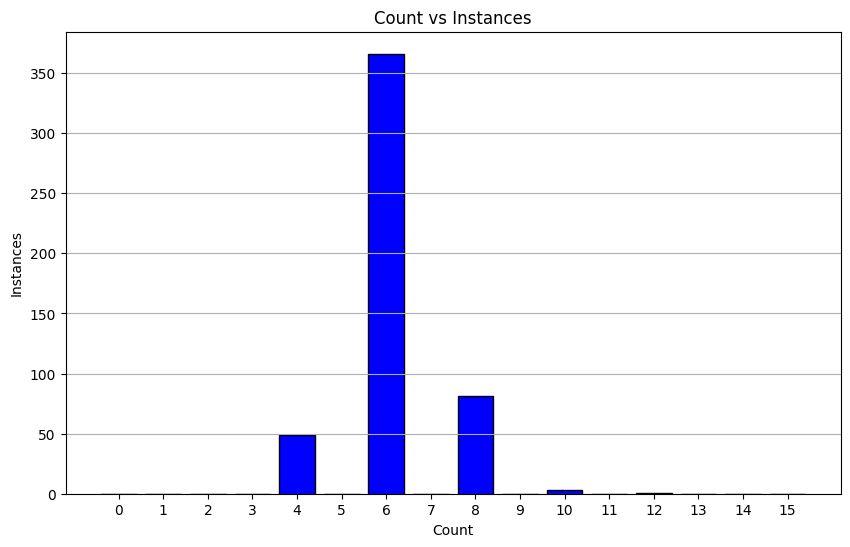

In [ ]:
import matplotlib.pyplot as plt

# Given counter array
counter = [0, 0, 0, 0, 49, 0, 366, 0, 81, 0, 3, 0, 1, 0, 0, 0]

# X-axis values (number of hits)
x_values = list(range(len(counter)))

# Y-axis values (counts)
y_values = counter

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='blue', edgecolor='black')

# Set the title and labels
plt.title('Count vs Instances')
plt.xlabel('Count')
plt.ylabel('Instances')

# Show the plot
plt.xticks(x_values)  # Ensure all x-ticks are shown
plt.grid(axis='y')    # Add grid lines for better readability
plt.show()


Index 10  value:  37
Index 12  value:  50
Index 14  value:  4
Index 20  value:  2
Index 38  value:  1
Index 42  value:  2
Index 50  value:  1
Index 68  value:  1
Index 78  value:  1
Index 80  value:  1


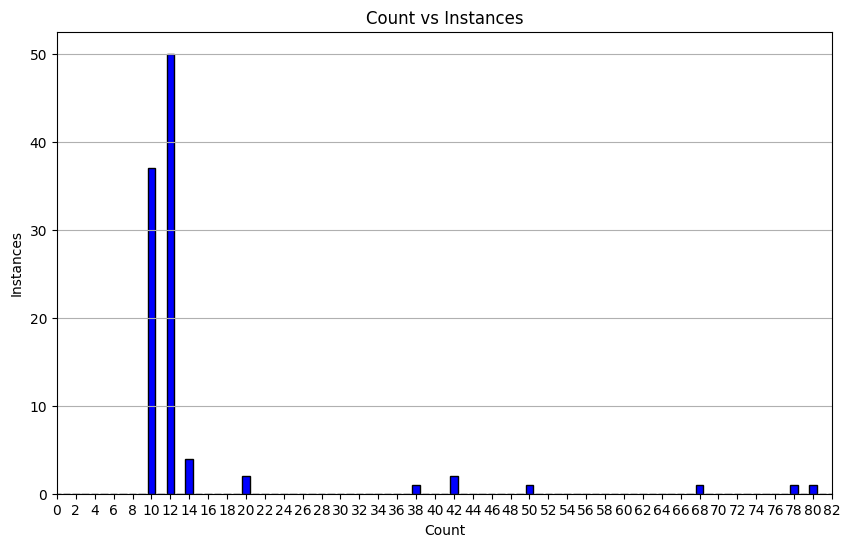

In [ ]:
import matplotlib.pyplot as plt

# Given counter array
# counter = [0, 0, 0, 0, 49, 0, 366, 0, 81, 0, 3, 0, 1, 0, 0, 0]

counter = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 37, 0, 50, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Loop through the array and print the indexes of nonzero elements
for index, value in enumerate(counter):
    if value != 0:
        print("Index", index, " value: ", value)

# X-axis values (number of hits)
x_values = list(range(len(counter)))

# Y-axis values (counts)
y_values = counter

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='blue', edgecolor='black')

# Set the title and labels
plt.title('Count vs Instances')
plt.xlabel('Count')
plt.ylabel('Instances')

# Set the x-axis limit
plt.xlim(0, 80)

# Show the plot
plt.xticks(range(0,84,2))  # Ensure all x-ticks are shown
plt.grid(axis='y')    # Add grid lines for better readability
plt.show()


In [ ]:
# Initialize the difference table
size = 256 # Log2(size) = input size in bits
mask = 0xFF #Input mask
diffTabOriginal = [[0 for _ in range(size)] for _ in range(size)]
counter = [0]*size
maxIterations = 100
tens = [0]*(maxIterations+1)
twe = [0]*(maxIterations+1)

# Initial value of the chaotic map (taken from numbers of pi)
x = 0x03486104
# x = 0x0123124A
highest = 0

print(getFixedPoint(x))

#Iterate r times
def logi(x,r):
    # x = rx(1-x) = rx-x^2
    for i in range(r):
      x = MUL(MUL(M, x), ONE - x)
    return x


for iterations in range(1,maxIterations+1):
  highest = 0
  diffTabOriginal = [[0 for _ in range(size)] for _ in range(size)]
  for dx in range(size):
      for i in range(size):
        j = dx ^ i
        dy = (logi(x ^ i,iterations) & mask) ^ (logi(x ^ j,iterations) & mask)
        diffTabOriginal[dx][dy] += 1

  for i in range(size):
      for j in range(size):
          if ((diffTabOriginal[i][j] >= highest) and (diffTabOriginal[i][j] !=size) and (diffTabOriginal[i][j]!=0)):
            highest = diffTabOriginal[i][j]

  counter[highest] = counter[highest]+1
  if (highest == 10):
    tens[iterations-1] = tens[iterations-1]+1
  if (highest == 12):
    twe[iterations-1] = twe[iterations-1]+1


print(tens)
print(twe)

0.05129266157746315
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0]


Plot graph for distribution

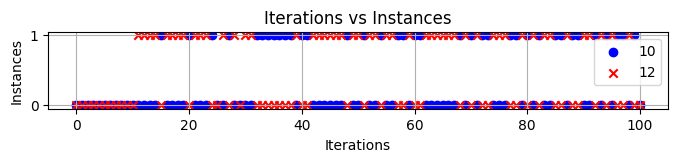

In [ ]:
import matplotlib.pyplot as plt

# Given arrays
tens = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
twe = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0]

# X-axis values (number of iterations)
iterations = list(range(len(tens)))
# Create a figure with a specific size (width, height)
plt.figure(figsize=(8, 1))  # Width: 8 inches, Height: 4 inches
# Plot tens array as scatter plot
plt.scatter(iterations, tens, color='blue', label='10', marker='o')

# Plot twe array as scatter plot
plt.scatter(iterations, twe, color='red', label='12', marker='x')

# Set the title and labels
plt.title('Iterations vs Instances')
plt.xlabel('Iterations')
plt.ylabel('Instances')

# Set y-axis ticks to "yes" and "no"
plt.yticks([0, 1], ['0', '1'])

# Add legend
plt.legend()
# Show the plot
plt.grid(True)
plt.show()


---
# Experiment 2



---
### 4-bit DDT experiments
x_0∈{0x00000001,0x00000002,0x00000004,…,0x4000000}.

9.313225746154785e-10
[4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 8, 8, 4, 6, 4, 6, 6, 6, 6, 6, 8]
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864]


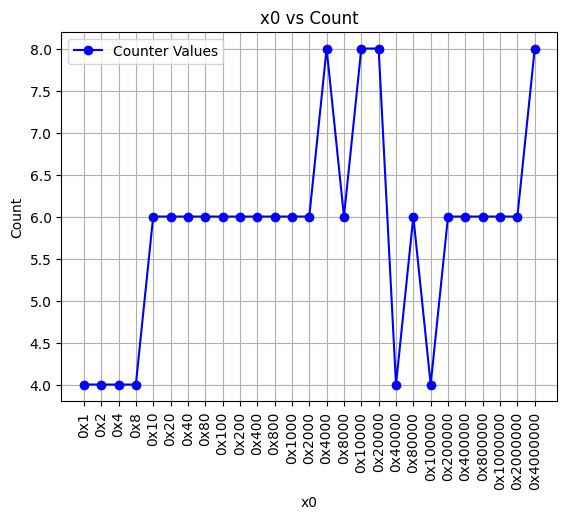

In [ ]:
# Initialize the difference table
size = 16 # Log2(size) = input size in bits
mask = 0xF #Input mask
diffTabOriginal = [[0 for _ in range(size)] for _ in range(size)]
counter = [0]*27 #There are 27 x0s
iterations = 500

# Initial value of the chaotic map (taken from numbers of pi)
x = 0x00000001

x_list = [x]

print(getFixedPoint(x))

#Iterate r times
def logi(xx,r):
    # x = rx(1-x) = rx-x^2
    for i in range(r):
      xx = MUL(MUL(M, xx), ONE - xx)
    return xx

z = 0
while(x<=0x4000000):
  highest = 0
  diffTabOriginal = [[0 for _ in range(size)] for _ in range(size)]
  for dx in range(size):
      for i in range(size):
        j = dx ^ i
        dy = (logi(x ^ i,iterations) & mask) ^ (logi(x ^ j,iterations) & mask)
        diffTabOriginal[dx][dy] += 1

  for i in range(size):
    for j in range(size):
      # print(f"{diffTabOriginal[i][j]}, ", end="")
      if ((diffTabOriginal[i][j] >= highest) and (diffTabOriginal[i][j] !=size) and (diffTabOriginal[i][j]!=0)):
        highest = diffTabOriginal[i][j]
  #   print()
  # print("---")

  counter[z] = highest
  z = z + 1

  x = x*2
  if (x<0x8000000):
    x_list.append(x)

print(counter)
print(x_list)

# Convert x_list to hexadecimal strings
x_labels_hex = [hex(x) for x in x_list]

# Plotting the line plot
plt.plot(x_labels_hex, counter, marker='o', linestyle='-', color='b', label='Counter Values')

# Adding labels and title
plt.xlabel('x0')
plt.ylabel('Count')
plt.title('x0 vs Count')

# Adding grid
plt.grid(True)

# Showing legend
plt.legend()

# Displaying the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Increase x_0 incrementally

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


Text(0, 0.5, 'Max Count')

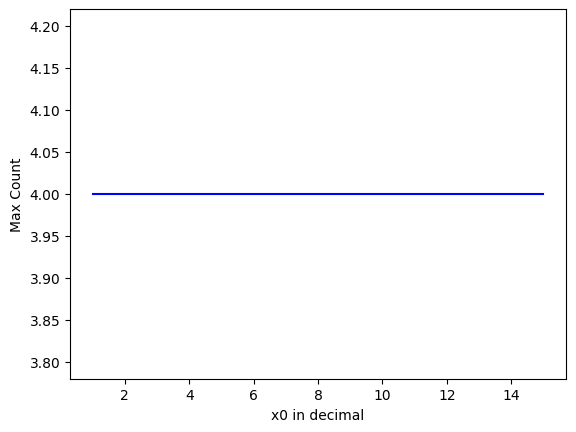

In [ ]:
import matplotlib.pyplot as plt

# Initialize the difference table
size = 16 # Log2(size) = input size in bits
mask = 0xF #Input mask
diffTabOriginal = [[0 for _ in range(size)] for _ in range(size)]
max = 0xF
counter = [0]*max
iterations = 500

# Initial value of the chaotic map (taken from numbers of pi)
x = 0x00000001

#Iterate r times
def logi(xx,r):
    # x = rx(1-x) = rx-x^2
    for i in range(r):
      xx = MUL(MUL(M, xx), ONE - xx)
    return xx

z = 0
while(x<=max):
  highest = 0
  diffTabOriginal = [[0 for _ in range(size)] for _ in range(size)]
  for dx in range(size):
      for i in range(size):
        j = dx ^ i
        dy = (logi(x ^ i,iterations) & mask) ^ (logi(x ^ j,iterations) & mask)
        diffTabOriginal[dx][dy] += 1

  for i in range(size):
    for j in range(size):
      # print(f"{diffTabOriginal[i][j]}, ", end="")
      if ((diffTabOriginal[i][j] >= highest) and (diffTabOriginal[i][j] !=size) and (diffTabOriginal[i][j]!=0)):
        highest = diffTabOriginal[i][j]
  #   print()
  # print("---")

  counter[z] = highest
  z = z + 1

  x = x+1

print(counter)

# X-axis values (range from 1 to 10)
x_values = list(range(1, max+1))

# Plotting the line plot
plt.plot(x_values, counter, linestyle='-', color='b', label='Counter Values')

# Adding labels and title
plt.xlabel('x0 in decimal')
plt.ylabel('Max Count')

---
### 8-bit DDT experiments

9.313225746154785e-10
[10, 10, 10, 10, 10, 10, 10, 10, 12, 10, 12, 12, 10, 12, 12, 12, 10, 16, 10, 12, 12, 12, 10, 14, 12, 12, 12]
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864]


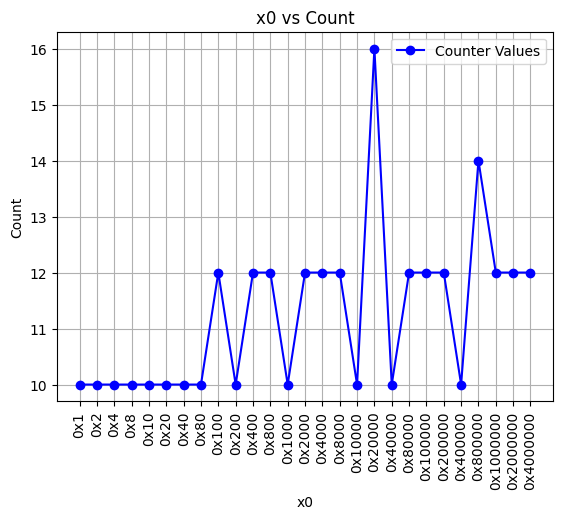

In [ ]:
# Initialize the difference table
size = 256 # Log2(size) = input size in bits
mask = 0xFF #Input mask
diffTabOriginal = [[0 for _ in range(size)] for _ in range(size)]
counter = [0]*27 #There are 27 x0s
iterations = 50

# Initial value of the chaotic map (taken from numbers of pi)
x = 0x00000001

x_list = [x]

print(getFixedPoint(x))

#Iterate r times
def logi(xx,r):
    # x = rx(1-x) = rx-x^2
    for i in range(r):
      xx = MUL(MUL(M, xx), ONE - xx)
    return xx

z = 0
while(x<=0x4000000):
  highest = 0
  diffTabOriginal = [[0 for _ in range(size)] for _ in range(size)]
  for dx in range(size):
      for i in range(size):
        j = dx ^ i
        dy = (logi(x ^ i,iterations) & mask) ^ (logi(x ^ j,iterations) & mask)
        diffTabOriginal[dx][dy] += 1

  for i in range(size):
    for j in range(size):
      # print(f"{diffTabOriginal[i][j]}, ", end="")
      if ((diffTabOriginal[i][j] >= highest) and (diffTabOriginal[i][j] !=size) and (diffTabOriginal[i][j]!=0)):
        highest = diffTabOriginal[i][j]
  #   print()
  # print("---")

  counter[z] = highest
  z = z + 1

  x = x*2
  if (x<0x8000000):
    x_list.append(x)

print(counter)
print(x_list)

# Convert x_list to hexadecimal strings
x_labels_hex = [hex(x) for x in x_list]

# Plotting the line plot
plt.plot(x_labels_hex, counter, marker='o', linestyle='-', color='b', label='Counter Values')

# Adding labels and title
plt.xlabel('x0')
plt.ylabel('Count')
plt.title('x0 vs Count')

# Adding grid
plt.grid(True)

# Showing legend
plt.legend()

# Displaying the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

Text(0, 0.5, 'Max Count')

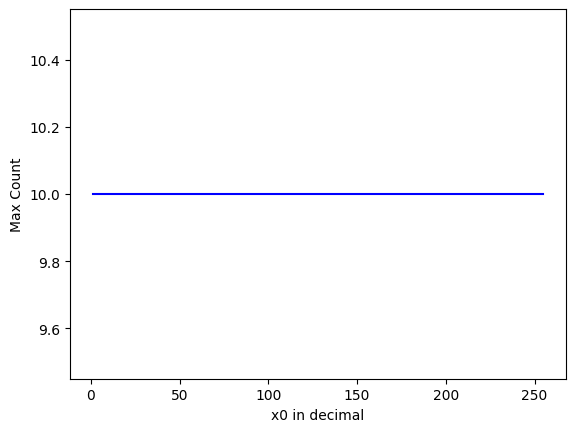

In [ ]:
import matplotlib.pyplot as plt

# Initialize the difference table
size = 256 # Log2(size) = input size in bits
mask = 0xFF #Input mask
diffTabOriginal = [[0 for _ in range(size)] for _ in range(size)]
max = 0xFF
counter = [0]*max
iterations = 50

# Initial value of the chaotic map (taken from numbers of pi)
x = 0x00000001

#Iterate r times
def logi(xx,r):
    # x = rx(1-x) = rx-x^2
    for i in range(r):
      xx = MUL(MUL(M, xx), ONE - xx)
    return xx

z = 0
while(x<=max):
  highest = 0
  diffTabOriginal = [[0 for _ in range(size)] for _ in range(size)]
  for dx in range(size):
      for i in range(size):
        j = dx ^ i
        dy = (logi(x ^ i,iterations) & mask) ^ (logi(x ^ j,iterations) & mask)
        diffTabOriginal[dx][dy] += 1

  for i in range(size):
    for j in range(size):
      # print(f"{diffTabOriginal[i][j]}, ", end="")
      if ((diffTabOriginal[i][j] >= highest) and (diffTabOriginal[i][j] !=size) and (diffTabOriginal[i][j]!=0)):
        highest = diffTabOriginal[i][j]
  #   print()
  # print("---")

  counter[z] = highest
  z = z + 1

  x = x+1

print(counter)

# X-axis values (range from 1 to 10)
x_values = list(range(1, max+1))

# Plotting the line plot
plt.plot(x_values, counter, linestyle='-', color='b', label='Counter Values')

# Adding labels and title
plt.xlabel('x0 in decimal')
plt.ylabel('Max Count')

---
# FBCT

In [ ]:
# Initialize the difference table
size = 16 # Log2(size) = input size in bits
mask = 0xF #Input mask
diffTabOriginal = [[0 for _ in range(size)] for _ in range(size)]
max = 0xF
counter = [0]*max
iterations = 100

# Initial value of the chaotic map (taken from numbers of pi)
x0 = 0x03486104

#Iterate r times
def logi(xx,r):
    # x = rx(1-x) = rx-x^2
    for i in range(r):
      xx = MUL(MUL(M, xx), ONE - xx)
    return xx

# Initialize FBCT array with zeros
FBCT = [[0 for _ in range(16)] for _ in range(16)]

# Compute the FBCT values
for Di in range(16):
    for Do in range(16):
        for x in range(16):
            diff = (logi(x0^x,iterations)&mask) ^ (logi(x0^x^Di,iterations)&mask) ^ (logi(x0 ^ x ^ Do, iterations)&mask) ^ (logi(x0^ x ^ Di ^ Do, iterations)&mask)
            if diff == 0:
                FBCT[Di][Do] += 1


for i in range(16):
    row_label = format(i, 'X')  # Convert the row index to hexadecimal
    print(f"{row_label}", end="& ")
    for j in range(16):
        separator = " \\\\" if j == 15 else " & "
        print(f"{FBCT[i][j]}{separator}", end="")
    print()


0& 16 & 16 & 16 & 16 & 16 & 16 & 16 & 16 & 16 & 16 & 16 & 16 & 16 & 16 & 16 & 16 \\
1& 16 & 16 & 4 & 4 & 4 & 4 & 4 & 4 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
2& 16 & 4 & 16 & 4 & 0 & 0 & 0 & 0 & 0 & 4 & 0 & 4 & 0 & 4 & 0 & 4 \\
3& 16 & 4 & 4 & 16 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
4& 16 & 4 & 0 & 0 & 16 & 4 & 0 & 0 & 4 & 0 & 0 & 0 & 4 & 0 & 0 & 0 \\
5& 16 & 4 & 0 & 0 & 4 & 16 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
6& 16 & 4 & 0 & 0 & 0 & 0 & 16 & 4 & 0 & 0 & 4 & 0 & 4 & 0 & 0 & 0 \\
7& 16 & 4 & 0 & 0 & 0 & 0 & 4 & 16 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
8& 16 & 0 & 0 & 0 & 4 & 0 & 0 & 0 & 16 & 0 & 0 & 0 & 4 & 0 & 0 & 0 \\
9& 16 & 0 & 4 & 0 & 0 & 0 & 0 & 0 & 0 & 16 & 0 & 4 & 0 & 0 & 0 & 0 \\
A& 16 & 0 & 0 & 0 & 0 & 0 & 4 & 0 & 0 & 0 & 16 & 0 & 4 & 0 & 0 & 0 \\
B& 16 & 0 & 4 & 0 & 0 & 0 & 0 & 0 & 0 & 4 & 0 & 16 & 0 & 0 & 0 & 0 \\
C& 16 & 0 & 0 & 0 & 4 & 0 & 4 & 0 & 4 & 0 & 4 & 0 & 16 & 0 & 0 & 0 \\
D& 16 & 0 & 4 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 16 & 0 & 4 \\
E& 16 

In [ ]:
# WARP S-box
s = [0xc, 0xa, 0xd, 0x3, 0xe, 0xb, 0xf, 0x7, 0x8, 0x9, 0x1, 0x5, 0x0, 0x2, 0x4, 0x6]

# Initialize FBCT array with zeros
FBCT = [[0 for _ in range(16)] for _ in range(16)]

# Compute the FBCT values
for Di in range(16):
    for Do in range(16):
        for x in range(16):
            diff = s[x] ^ s[x ^ Di] ^ s[x ^ Do] ^ s[x ^ Di ^ Do]
            if diff == 0:
                FBCT[Di][Do] += 1

# Print FBCT array
print("FBCT:")
for i in range(16):
    for j in range(16):
        print(f"{FBCT[i][j]},\t", end="")
    print()


FBCT:
16,	16,	16,	16,	16,	16,	16,	16,	16,	16,	16,	16,	16,	16,	16,	16,	
16,	16,	4,	4,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	
16,	4,	16,	4,	4,	0,	4,	0,	0,	4,	0,	4,	4,	0,	4,	0,	
16,	4,	4,	16,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	
16,	0,	4,	0,	16,	0,	4,	0,	0,	0,	0,	0,	0,	0,	0,	0,	
16,	0,	0,	0,	0,	16,	0,	0,	0,	0,	8,	0,	0,	0,	0,	8,	
16,	0,	4,	0,	4,	0,	16,	0,	0,	0,	0,	0,	0,	0,	0,	0,	
16,	0,	0,	0,	0,	0,	0,	16,	0,	0,	8,	0,	0,	8,	0,	0,	
16,	0,	0,	0,	0,	0,	0,	0,	16,	0,	0,	0,	0,	0,	0,	0,	
16,	0,	4,	0,	0,	0,	0,	0,	0,	16,	0,	4,	0,	0,	0,	0,	
16,	0,	0,	0,	0,	8,	0,	8,	0,	0,	16,	0,	0,	8,	0,	8,	
16,	0,	4,	0,	0,	0,	0,	0,	0,	4,	0,	16,	0,	0,	0,	0,	
16,	0,	4,	0,	0,	0,	0,	0,	0,	0,	0,	0,	16,	0,	4,	0,	
16,	0,	0,	0,	0,	0,	0,	8,	0,	0,	8,	0,	0,	16,	0,	0,	
16,	0,	4,	0,	0,	0,	0,	0,	0,	0,	0,	0,	4,	0,	16,	0,	
16,	0,	0,	0,	0,	8,	0,	0,	0,	0,	8,	0,	0,	0,	0,	16,	
